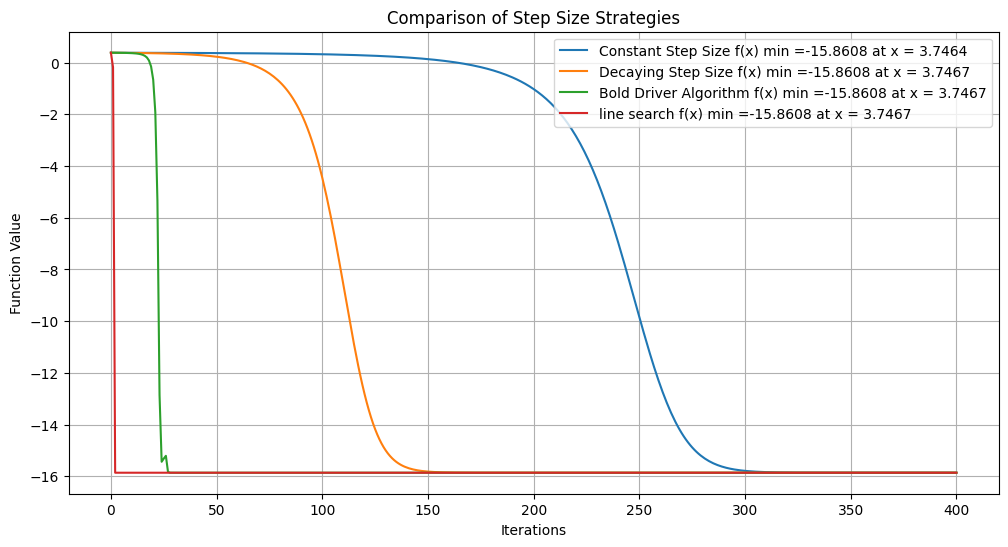

In [58]:
import numpy as Numpy
from scipy.optimize import line_search

import matplotlib.pyplot as plt

# Define the function and its derivative
def func(x):
    return x**2 * Numpy.cos(x) + Numpy.sin(x) - x

def dfunc(x):
    return 2*x*Numpy.cos(x) - x**2*Numpy.sin(x) + Numpy.cos(x) - 1

#gradient descent using constant step size

def gradient_descent_constant_step_size(df, x0, constantstepsize, max):
    x = x0
    history = [func(x)]

    for t in range(max):
        gradient = df(x)
        x = x - constantstepsize * gradient
        history.append(func(x))

    return history,round(x,4),round(func(x),4)

def goldenSection(x0, d0, func, start=0, end=2, epsilon=1e-4):

    # find two insertion points using fixed ratio
    from math import sqrt
    ratio = sqrt(5) / 2 - 0.5
    intervalLen = end - start
    middleL = start + (1 - ratio) * intervalLen
    middleR = start + ratio * intervalLen

    while intervalLen >= epsilon:
        # update start or end point and two insertion points
        if func(x0 + middleL * d0) > func(x0 + middleR * d0):
            start = middleL
            intervalLen = end - start
            middleL = middleR
            middleR = start + ratio * intervalLen
        else:
            end = middleR
            intervalLen = end - start
            middleR = middleL
            middleL = start + (1 - ratio) * intervalLen

    return (start + end) / 2


def gradient_descent_line_search(df, x0, max_iters):
    x = x0
    history = [func(x)]
    for t in range(max_iters):
        gradient = df(x)
        gamma =  goldenSection(x,-gradient,func)
        x = x - gamma* gradient
        history.append(func(x))
    return history,round(x,4),round(func(x),4)


def gradient_descent_decay(df, x_init, gamma, max_iters,alpha=0.01, k=0.01):
    x = x_init
    history = [func(x)]

    for t in range(max_iters):
        gradient = df(x)

        gamma = alpha / (1 + k * t)
        x = x - gamma * gradient
        history.append(func(x))

    return history,round(x,4),round(func(x),4)

def gradient_descent_bold_driver(df, x_init, gamma, max_iters):
    x = x_init
    history = [func(x)]

    for t in range(max_iters):
        gradient = df(x)
        if func(x - gamma * gradient) < func(x):
            gamma = 1.1 * gamma
        else:
            gamma = 0.5 * gamma

        x = x - gamma * gradient
        history.append(func(x))

    return history,round(x,4),round(func(x),4)

# Parameters
x_init = 1 # Initial guess
gamma = 0.01
max_iters = 400

# Run Gradient Descent for each strategy
history_linesearch,x4,fvalue4 = gradient_descent_line_search(dfunc, x_init,max_iters)
history_constant,x1,fvalue1 = gradient_descent_constant_step_size(dfunc, x_init, 0.003, max_iters)
history_decaying,x2,fvalue2 = gradient_descent_decay(dfunc, x_init, gamma, max_iters)
history_bold_driver,x3,fvalue3 = gradient_descent_bold_driver(dfunc, x_init, gamma, max_iters)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(history_constant, label="Constant Step Size f(x) min ="+str(fvalue1)+" at x = "+str(x1))
plt.plot(history_decaying, label="Decaying Step Size f(x) min ="+str(fvalue2)+" at x = "+str(x2))
plt.plot(history_bold_driver, label="Bold Driver Algorithm f(x) min ="+str(fvalue3)+" at x = "+str(x3))
plt.plot(history_linesearch, label="line search f(x) min ="+str(fvalue4)+" at x = "+str(x4))
plt.title('Comparison of Step Size Strategies')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)
plt.show()
